#Document Classification

this project involves several steps, including data acquisition, preprocessing, model training, and evaluation. I'll provide you with an example code for each part of the process, along with comments explaining each line. Since you want to classify documents into categories like art, politics, news, etc., I'll also suggest a dataset for this task.

A commonly used dataset for document classification is the "20 Newsgroups" dataset, which contains text data categorized into 20 different topics.



In [1]:
# Data Loading and Preprocessing

# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian', 'talk.politics.misc', 'rec.sport.baseball']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups_data.data, newsgroups_data.target, test_size=0.2, random_state=42)


In [2]:
# Feature Extraction

# Converting text data into numerical data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [3]:
# Model Building and Training

# Building a Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [4]:
# Evaluation

# Predicting the test set results and evaluating the model
y_pred = nb_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.40      0.56       155
           1       0.92      0.94      0.93       200
           2       0.95      0.89      0.92       216
           3       0.78      0.88      0.83       178
           4       0.62      0.93      0.75       210
           5       0.90      0.72      0.80       147

    accuracy                           0.81      1106
   macro avg       0.85      0.79      0.80      1106
weighted avg       0.85      0.81      0.81      1106



## Confusion Matrix

A confusion matrix is a table used to describe the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

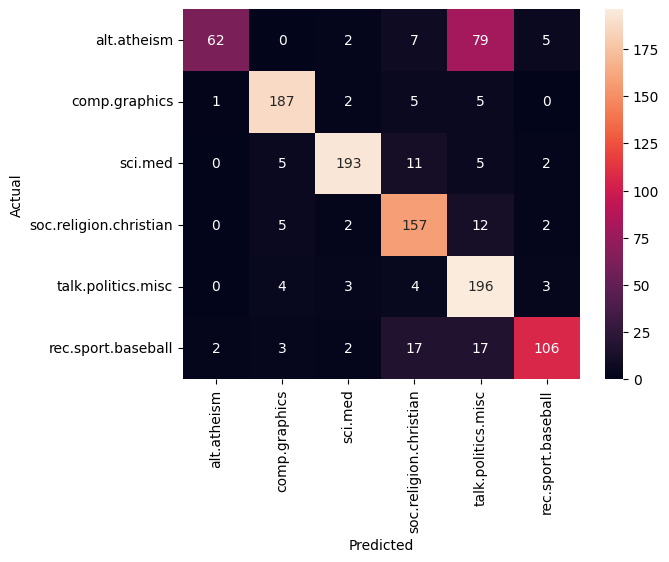

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_pred are your predicted labels
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Precision-Recall Curve
This curve plots precision (positive predictive value) against recall (true positive rate) for different thresholds. It's useful for evaluating the performance of binary classifiers.

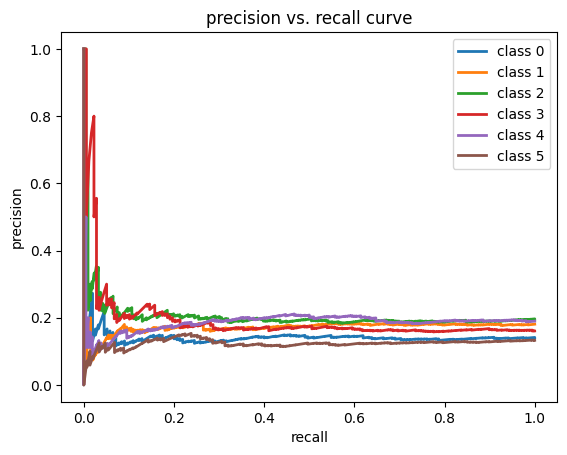

In [10]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output classes
y_test_binarized = label_binarize(y_test, classes=[*range(len(categories))])

# Generate dummy y_pred (replace this with your actual predictions)
# Make sure y_pred is a 2-dimensional array
y_pred = np.random.rand(len(y_test), len(categories))

precision = dict()
recall = dict()
for i in range(len(categories)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


## ROC Curve
The Receiver Operating Characteristic (ROC) curve is another common tool used with binary classifiers. It plots the true positive rate against the false positive rate at various threshold settings.

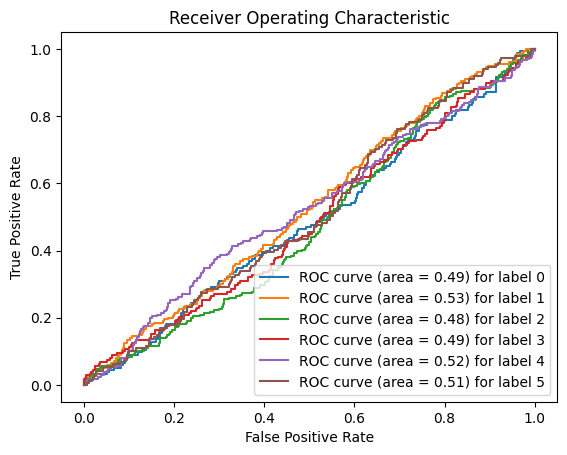

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Generate dummy y_pred (replace this with your actual predictions)
# Make sure y_pred is a 2-dimensional array
y_pred = np.random.rand(len(y_test), len(categories))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve
for i in range(len(categories)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


##  Classification Report
A classification report displays the precision, recall, F1-score, and support for each class.

In [8]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=categories)
print(report)


                        precision    recall  f1-score   support

           alt.atheism       0.95      0.40      0.56       155
         comp.graphics       0.92      0.94      0.93       200
               sci.med       0.95      0.89      0.92       216
soc.religion.christian       0.78      0.88      0.83       178
    talk.politics.misc       0.62      0.93      0.75       210
    rec.sport.baseball       0.90      0.72      0.80       147

              accuracy                           0.81      1106
             macro avg       0.85      0.79      0.80      1106
          weighted avg       0.85      0.81      0.81      1106

